# Introduction to Pandas

*Pandas* is an open source package for powerful data analysis with Python.
The package provides the following classes and their operations

- *Series*:      1D labeled homogeneously-typed array
- *TimeSeries*:  Series with datatimes as index
- *DataFrame*:   2D labeled, size-mutable tabular structure
- *Panel* (deprecated):   3D labeled, size-mutable array

A DataFrame consists of indices and columns.

In [1]:
%matplotlib inline

<img src="extras/dataframe.png" />

In [3]:
# Set up inline plots in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# For larger, high-resolution figures by default:
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)

import numpy as np
import pandas as pd
import seaborn as sns

# Limit the number of rows and cols displayed for DataFrames:
pd.options.display.max_rows = 5
pd.options.display.max_columns = 6

# Tip: adjust the display precision, so it's easier to read
#pd.set_eng_float_format(accuracy=1)
pd.options.display.precision = 3

## Basic operations with Series

Pandas is conventially imported as follows:

In [4]:
import pandas as pd

Pandas offers `Series`, which are a cross between arrays and dictionaries. They have these properties:
- ordered
- common data type for all elements
- indexed for fast (O(1)) lookups of data from labels
- indices can contain duplicates (although usually don't)

In [5]:
series1 = pd.Series(range(3), index=("X","Y","Z"))
series1

series2 = pd.Series(range(3), index=("U","V","X"))
series2

U    0
V    1
X    2
dtype: int64

## Basic operations with DataFrames

In [6]:
# Create a data frame using a dictionary.
df = pd.DataFrame({"A":range(3), "B":range(3)}, index=("X","Y","Z"))
df

,A,B
X,0,0
Y,1,1
Z,2,2


In [7]:
# Create a data frame by combining Series.
df = pd.DataFrame({"A":series1, "B":series2})
df

,A,B
U,NaN,0.0
V,NaN,1.0
X,0.0,2.0
Y,1.0,NaN
Z,2.0,NaN


## Reading data from files

You can use Pandas to read data from files. CSVs are commonly used, but pandas supports many more options.

In [8]:
import pandas as pd

In [9]:
# Try entering pd.read_ and then press TAB

In [10]:
countries = pd.read_csv("/data/countries.csv")
countries

,UN code number,2 letter ISO abbreviation,3-letter ISO abbreviation,name,capital
0,4,AF,AFG,Afghanistan,Kabul
1,8,AL,ALB,Albania,Tirana
...,...,...,...,...,...
220,891,YU,YUG,Yugoslavia,Belgrade
221,894,ZM,ZMB,Zambia,Lusaka


In [11]:
countries = pd.read_csv("/data/countries.csv", index_col='name')
countries

,UN code number,2 letter ISO abbreviation,3-letter ISO abbreviation,capital
name,,,,
Afghanistan,4,AF,AFG,Kabul
Albania,8,AL,ALB,Tirana
...,...,...,...,...
Yugoslavia,891,YU,YUG,Belgrade
Zambia,894,ZM,ZMB,Lusaka


In [12]:
# Read tabular data from a file.
abalone = pd.read_csv("/data/abalone.csv", index_col=0)
abalone.head()  # Return the first 5 rows.

,sex,length,diameter,...,viscera weight,shell weight,rings
0,M,0.455,0.365,...,0.101,0.150,15
1,M,0.350,0.265,...,0.049,0.070,7
2,F,0.530,0.420,...,0.141,0.210,9
3,M,0.440,0.365,...,0.114,0.155,10
4,I,0.330,0.255,...,0.040,0.055,7


The data was collected as part of an effort to predict the age of abalone from physical measurements. It comes from this study:

- Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994). "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288)

In [14]:
type(abalone) # DataFrame object

pandas.core.frame.DataFrame

In [122]:
abalone.tail(3)   # display the last 3 rows

,sex,length,diameter,...,shell weight,rings,weight to diameter ratio
4174,M,0.600,0.475,...,0.308,9,2.476
4175,F,0.625,0.485,...,0.296,10,2.257
4176,M,0.710,0.555,...,0.495,12,3.511


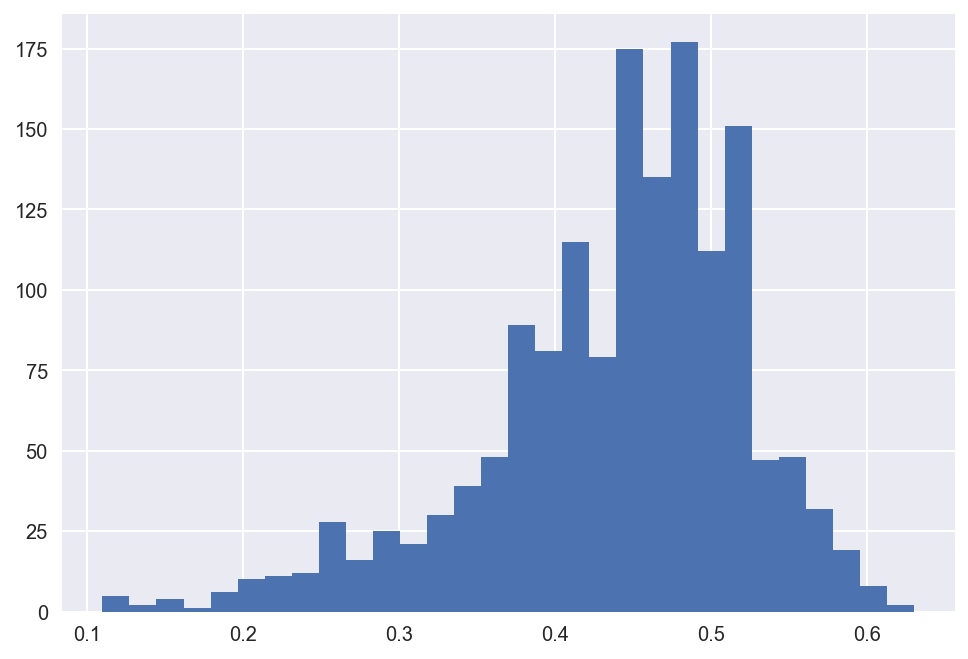

In [13]:
abalone[abalone["sex"] == "M"]["diameter"].hist(bins=30)

We will come back to this type of plotting later.

## Extracing information from DataFrames

In [17]:
abalone.columns # Return column index object.

Index(['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings'],
      dtype='object')

In [18]:
abalone.columns[::2] # every second column

Index(['sex', 'diameter', 'whole weight', 'viscera weight', 'rings'], dtype='object')

In [19]:
type(abalone["shell weight"]) # A column is a Series object.

pandas.core.series.Series

In [20]:
# Handle a data frame as a dictonary and return a column:
abalone["sex"].unique()

array(['M', 'F', 'I'], dtype=object)

Columns can be accessed as attributes of a DataFrame
as an alternative to dict-style indexing:

In [21]:
abalone.sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [22]:
abalone.columns

Index(['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings'],
      dtype='object')

### Creating new columns

In [23]:
# Add a new column at the end:
abalone["weight to diameter ratio"] = abalone["whole weight"] / abalone["diameter"]
abalone

,sex,length,diameter,...,shell weight,rings,weight to diameter ratio
0,M,0.455,0.365,...,0.150,15,1.408
1,M,0.350,0.265,...,0.070,7,0.851
...,...,...,...,...,...,...,...
4175,F,0.625,0.485,...,0.296,10,2.257
4176,M,0.710,0.555,...,0.495,12,3.511


In [24]:
filename = '/data/olympics_detailed.csv'

First 10 lines of the file:

In [ ]:
Medals won by country,,,,,
"Final count (revised 14 August after medal upgrade), London 2012 Olympic Games",,,,,
,,,,,
Country,Population (million),Gold,Silver,Bronze,Total
Grenada,0.10,1,0,0,1
Jamaica,2.74,4,4,4,12
Trinidad and Tobago,1.34,1,0,3,4
New Zealand,4.37,6,2,5,13
Bahamas,0.34,1,0,0,1
Slovenia,2.03,1,1,2,4

### Exercises

1. Load /data/olympics_detailed.csv using pandas
2. Compute the number of gold medals per million for each country
3. Which country was the most efficient by this measure?
4. Compute the weighted average, where gold medals are worth 7 points, silvers are worth 3, and bronze medals worth 1. Which country leads by this measure?

## Boolean Indexing

In [25]:
# Boolean indexing to extract rows matching certain criteria
index_arr = abalone['sex'] == 'M'
index_arr.head()  # a boolean Series object

0     True
1     True
2    False
3     True
4    False
Name: sex, dtype: bool

In [26]:
# Extract only data for male abalone
abalone[index_arr]

,sex,length,diameter,...,shell weight,rings,weight to diameter ratio
0,M,0.455,0.365,...,0.150,15,1.408
1,M,0.350,0.265,...,0.070,7,0.851
...,...,...,...,...,...,...,...
4174,M,0.600,0.475,...,0.308,9,2.476
4176,M,0.710,0.555,...,0.495,12,3.511


### Exercise: Forbes Dataset

1. Read in forbes1964.csv (in the data folder).
2. Which companies were Australian?
3. How much profit did each Australian company make?
4. Plot the top 20 Australian companies' profits.

## Plotting with Seaborn

Seaborn is a library that is built for visualising Pandas DataFrames. It build upon matplotlib, and hides much of the complexity. The result is a library that gives you great visuals out of the box, while you can still alter things directly with matplotlib if you want.

In [27]:
import seaborn as sns

In [28]:
# To get help:
# sns.boxplot?

In [162]:
oecd = pd.read_csv('/data/oecd_stats.csv')
oecd

,Country,Year,Population,GDP,Debt
0,Australia,2000,19153380,416923318470,11.360999999999999
1,Australia,2001,19413240,380427712783,9.552
...,...,...,...,...,...
68,United States,2008,304177400,14296900000000,40.183
69,United States,2009,306656300,14043900000000,53.573


We can make simplify the output by reducing the number of decimal places displayed as follows:

In [163]:
pd.options.display.float_format = '{:,.2f}'.format
oecd

,Country,Year,Population,GDP,Debt
0,Australia,2000,19153380,416923318470,11.36
1,Australia,2001,19413240,380427712783,9.55
...,...,...,...,...,...
68,United States,2008,304177400,14296900000000,40.18
69,United States,2009,306656300,14043900000000,53.57


In [30]:
countries = ["Australia", "France", "Japan"]
subset = oecd[oecd['Country'].isin(countries)]
subset

,Country,Year,Population,GDP,Debt
0,Australia,2000,19153380,416923318470,11.361
1,Australia,2001,19413240,380427712783,9.552
...,...,...,...,...,...
48,Japan,2008,127692000,4879861453768,180.783
49,Japan,2009,127510000,5032982758381,183.530


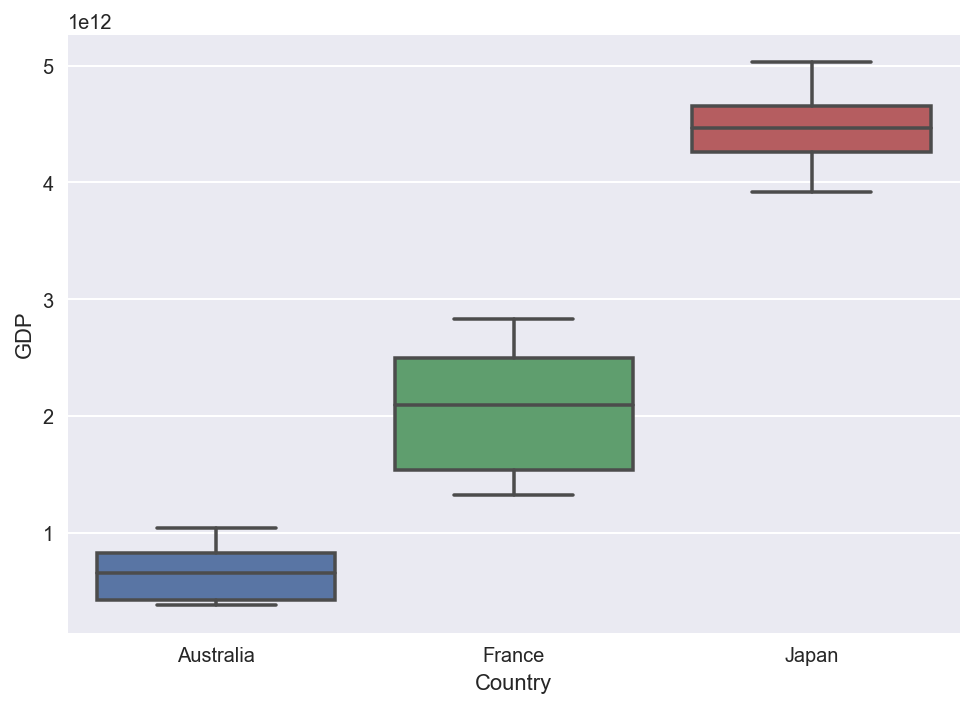

In [31]:
sns.boxplot(x="Country", y="GDP", data=subset)

## Indexing

The row index is an important feature of a Pandas Series or DataFrame. Without meaningful indices, you may as well use NumPy arrays (and get better performance).

In [32]:
medals = pd.read_csv('/data/olympics2012.csv', index_col=0)
medals

,Gold,Silver,Bronze
Country,,,
Afghanistan,0,0,1
Albania,0,0,0
...,...,...,...
Zambia,0,0,0
Zimbabwe,0,0,0


In [33]:
medals.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Virgin Islands',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba',
       ...
       'United Arab Emirates', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country', length=204)

In [34]:
oecd.index

RangeIndex(start=0, stop=70, step=1)

This is not meaningful.

In [35]:
oecd2 = oecd.set_index(['Country', 'Year'])

In [36]:
oecd2

Population             GDP    Debt
Country       Year                                    
Australia     2000    19153380    416923318470  11.361
              2001    19413240    380427712783   9.552
...                        ...             ...     ...
United States 2008   304177400  14296900000000  40.183
              2009   306656300  14043900000000  53.573

[70 rows x 3 columns]

This is better. This index is actually hierarchical:

In [37]:
oecd2.index

MultiIndex(levels=[['Australia', 'Canada', 'France', 'Germany', 'Japan', 'United Kingdom', 'United States'], [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=['Country', 'Year'])

We will come back to hierarchical indices later.

## Selecting data

In [38]:
abalone[:3] # Normal array indexing on rows. This does not include abalone[3].

,sex,length,diameter,...,shell weight,rings,weight to diameter ratio
0,M,0.455,0.365,...,0.15,15,1.408
1,M,0.350,0.265,...,0.07,7,0.851
2,F,0.530,0.420,...,0.21,9,1.612


In [39]:
medals.loc['Australia']   # Indexing with a row label.

Gold       7
Silver    16
Bronze    12
Name: Australia, dtype: int64

In [40]:
medals.loc[:, ["Gold", "Bronze"]] # Select multiple columns.

,Gold,Bronze
Country,,
Afghanistan,0,1
Albania,0,0
...,...,...
Zambia,0,0
Zimbabwe,0,0


In [41]:
# Select multiple rows and multiple columns.
# Note: This includes the endpoints!
medals.loc["Australia":"France", ["Gold", "Silver"]]

,Gold,Silver
Country,,
Australia,7,16
Austria,0,0
...,...,...
Former Yugoslav Republic of Macedonia,0,0
France,11,11


In [42]:
start, end = medals.index[[1,5]] # Select the second and sixth row indices
medals.loc[start:end, ["Gold"]]

,Gold
Country,
Albania,0
Algeria,1
American Virgin Islands,0
Andorra,0
Angola,0


In [43]:
type(medals.loc[:, "Gold"]) # Return a series from a data frame.

pandas.core.series.Series

In [44]:
type(medals.loc[:, ["Gold"]]) # Return a data frame with a single column from a data frame.

pandas.core.frame.DataFrame

### Boolean indexing performs selection
#### Example: Which countries won more than 20 gold medals?

In [45]:
criterion = medals.Gold > 20
medals[criterion]    # Boolean indexing

,Gold,Silver,Bronze
Country,,,
"China, People's Republic of",38,27,23
Great Britain,29,17,19
Russia,24,26,32
United States of America,46,29,29


### Extracting data as NumPy arrays

Every DataFrame and Series has a `.values` attribute that provides access to the data as a NumPy array:

In [46]:
type(abalone.values) # 2-D numpy array

numpy.ndarray

In [47]:
abalone.values[:3,:3] # So, you can use a normal integer indexing for numpy arrays.

array([['M', 0.455, 0.365],
       ['M', 0.35, 0.265],
       ['F', 0.53, 0.42]], dtype=object)

## Descriptive statistics
The default axis for operations on a data frame is "index" (axis=0), but you can choose "columns" (axis=1).

In [48]:
abalone.mean() # Mean along each column.

length                      0.524
diameter                    0.408
                            ...  
rings                       9.934
weight to diameter ratio    1.852
Length: 9, dtype: float64

In [49]:
medals.mean(axis=1) # Mean along each row.

Country
Afghanistan    0.333
Albania        0.000
               ...  
Zambia         0.000
Zimbabwe       0.000
Length: 204, dtype: float64

In [50]:
medals.quantile(0.75) # 75% quantiles

Gold      1.0
Silver    1.0
Bronze    2.0
Name: 0.75, dtype: float64

In [51]:
abalone.quantile(0.75)

length                       0.615
diameter                     0.480
                             ...  
rings                       11.000
weight to diameter ratio     2.404
Name: 0.75, Length: 9, dtype: float64

In [52]:
# Describe basic statistics of each column.
pd.options.display.max_rows = 10
abalone.describe()

,length,diameter,height,...,shell weight,rings,weight to diameter ratio
count,4177.000,4177.000,4177.000,...,4177.000,4177.000,4177.000
mean,0.524,0.408,0.140,...,0.239,9.934,1.852
std,0.120,0.099,0.042,...,0.139,3.224,0.800
min,0.075,0.055,0.000,...,0.002,1.000,0.036
25%,0.450,0.350,0.115,...,0.130,8.000,1.259
50%,0.545,0.425,0.140,...,0.234,9.000,1.873
75%,0.615,0.480,0.165,...,0.329,11.000,2.404
max,0.815,0.650,1.130,...,1.005,29.000,4.749


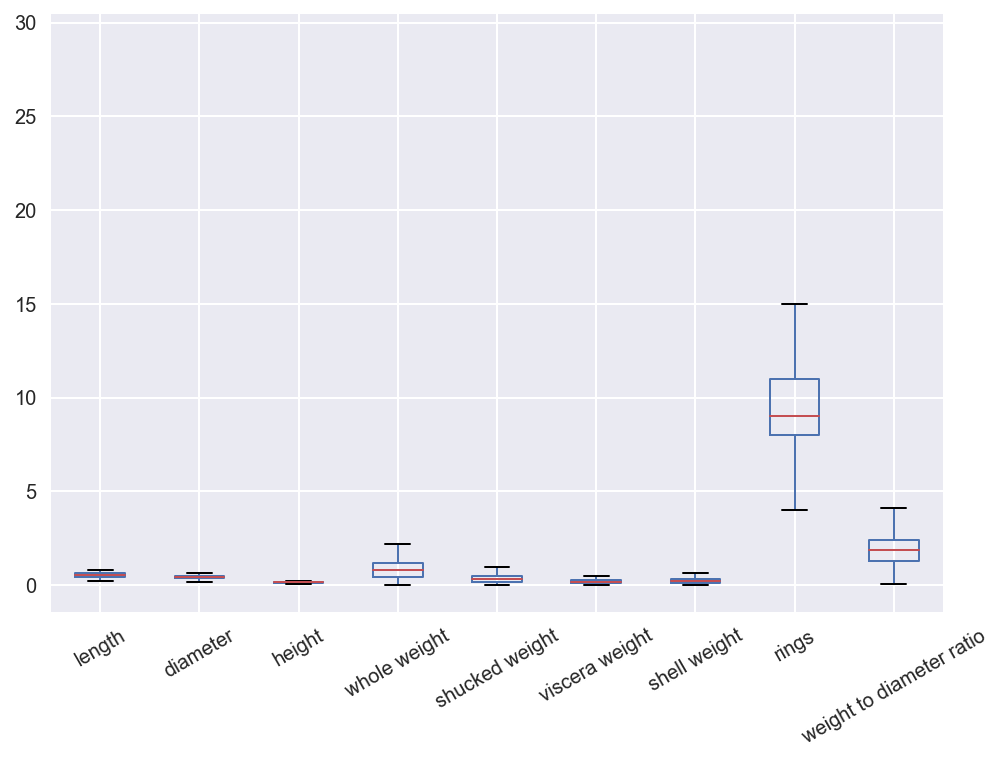

In [53]:
abalone.boxplot(rot=30);

In [54]:
abalone.min() # Find the minimum of each column.

sex                              F
length                       0.075
diameter                     0.055
height                           0
whole weight                 0.002
shucked weight               0.001
viscera weight              0.0005
shell weight                0.0015
rings                            1
weight to diameter ratio    0.0364
dtype: object

In [55]:
# Return the row index label which has the minimum value for a given column:
abalone['diameter'].idxmin()

236

## Applying functions to data frames

In [56]:
cars = pd.read_csv('/data/Auto.csv', index_col=0).set_index('name')

In [57]:
cars

,mpg,cylinders,displacement,...,acceleration,year,origin
name,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,...,12.0,70,1
buick skylark 320,15.0,8,350.0,...,11.5,70,1
plymouth satellite,18.0,8,318.0,...,11.0,70,1
amc rebel sst,16.0,8,304.0,...,12.0,70,1
ford torino,17.0,8,302.0,...,10.5,70,1
...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,...,15.6,82,1
vw pickup,44.0,4,97.0,...,24.6,82,2
dodge rampage,32.0,4,135.0,...,11.6,82,1


In [58]:
cars['origin'].unique()

array([1, 3, 2])

In [59]:
def origin_as_string(origin_index):
    return {1: 'USA', 2: 'Europe', 3: 'Japan'}[origin_index]

In [60]:
cars.apply(np.mean)   # Apply 'mean' function for each column. Same as cars.mean().

mpg               23.446
cylinders          5.472
displacement     194.412
horsepower       104.469
weight          2977.584
acceleration      15.541
year              75.980
origin             1.577
dtype: float64

In [61]:
medals.apply(np.sum, axis=1) # Apply 'sum' function for each row. Same as medals.sum(axis=1).

Country
Afghanistan                1
Albania                    0
Algeria                    1
American Virgin Islands    0
Andorra                    0
                          ..
Venezuela                  1
Viet Nam                   0
Yemen                      0
Zambia                     0
Zimbabwe                   0
Length: 204, dtype: int64

In [62]:
new_origins = cars['origin'].apply(origin_as_string)
new_origins

name
chevrolet chevelle malibu       USA
buick skylark 320               USA
plymouth satellite              USA
amc rebel sst                   USA
ford torino                     USA
                              ...  
ford mustang gl                 USA
vw pickup                    Europe
dodge rampage                   USA
ford ranger                     USA
chevy s-10                      USA
Name: origin, Length: 392, dtype: object

Most Pandas methods don't modify the objects but instead create and return new ones. We can create a new enhanced `cars` DataFrame with the more readable `origin` column as follows:

In [63]:
cars2 = pd.concat([cars.drop('origin', axis=1),
                   new_origins],
                  axis=1)

In [64]:
cars2

,mpg,cylinders,displacement,...,acceleration,year,origin
name,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,...,12.0,70,USA
buick skylark 320,15.0,8,350.0,...,11.5,70,USA
plymouth satellite,18.0,8,318.0,...,11.0,70,USA
amc rebel sst,16.0,8,304.0,...,12.0,70,USA
ford torino,17.0,8,302.0,...,10.5,70,USA
...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,...,15.6,82,USA
vw pickup,44.0,4,97.0,...,24.6,82,Europe
dodge rampage,32.0,4,135.0,...,11.6,82,USA


You can apply arbitrary functions to a Series / DataFrame. Here, we use a lambda function (defined in-place) to return the range.

In [65]:
abalone[['diameter', 'shell weight']].apply(lambda x: x.max() - x.min())

diameter        0.595
shell weight    1.003
dtype: float64

## Group-by
A powerful feature of Pandas is its ``groupby`` feature. Like the ``GROUP BY`` statement in SQL, this allows powerful aggregations on one or more columns (without the need for explicit loops).

The general pattern is:

1. Split: Split a DataFrame into subsets according to some criterion.
2. Apply: Apply some aggregation operation (e.g. `sum`, `mean`, `size`, `min`, `nlargest`, or a custom function).
3. Combine: Pandas combines the results for us into a `Series` or `DataFrame`.

In [66]:
grouped = cars.groupby(["cylinders"])
type(grouped) # DataFrameGroupBy

pandas.core.groupby.DataFrameGroupBy

In [67]:
# Apply the mean function for each column of each group.
cars.groupby(["cylinders"]).apply(np.mean)

,mpg,cylinders,displacement,...,acceleration,year,origin
cylinders,,,,,,,
3,20.550,3.0,72.500,...,13.250,75.500,3.000
4,29.284,4.0,109.671,...,16.582,77.030,2.000
5,27.367,5.0,145.000,...,18.633,79.000,2.000
6,19.973,6.0,218.361,...,16.254,75.952,1.193
8,14.963,8.0,345.010,...,12.955,73.903,1.000


Notice the mean of the `origin` column is nonsense.

In [68]:
# Apply the mean function to just one column:
cars.groupby(["cylinders"])['mpg'].apply(np.mean)

cylinders
3    20.550
4    29.284
5    27.367
6    19.973
8    14.963
Name: mpg, dtype: float64

In [69]:
# Apply the mean function to two columns:
cars.groupby(["cylinders"])[['mpg', 'weight']].apply(np.mean)  # notice two sets of brackets

,mpg,weight
cylinders,,
3,20.550,2398.500
4,29.284,2305.111
5,27.367,3103.333
6,19.973,3202.120
8,14.963,4114.718


### Which cars were the least fuel efficient and the heaviest within each cylinder group?

In [70]:
# Use `.agg()` to apply different functions to different columns:
cars.groupby(["cylinders"]).agg({"mpg":np.argmin, "weight":np.argmax})

,mpg,weight
cylinders,,
3,maxda rx3,mazda rx-4
4,volvo 145e (sw),peugeot 504
5,audi 5000,mercedes benz 300d
6,chevrolet nova,buick century
8,hi 1200d,pontiac safari (sw)


We can obtain the groupings as a Python dictionary as follows:

In [71]:
grouped = cars2.groupby(["origin"])
grouped.groups

{'Europe': Index(['volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
        'saab 99e', 'bmw 2002', 'opel 1900', 'peugeot 304', 'fiat 124b',
        'volkswagen model 111', 'volkswagen type 3', 'volvo 145e (sw)',
        'volkswagen 411 (sw)', 'peugeot 504 (sw)', 'renault 12 (sw)',
        'volkswagen super beetle', 'fiat 124 sport coupe', 'fiat 128',
        'opel manta', 'audi 100ls', 'volvo 144ea', 'saab 99le', 'audi fox',
        'volkswagen dasher', 'opel manta', 'fiat 128', 'fiat 124 tc',
        'fiat x1.9', 'volkswagen dasher', 'volkswagen rabbit', 'audi 100ls',
        'peugeot 504', 'volvo 244dl', 'saab 99le', 'fiat 131', 'opel 1900',
        'renault 12tl', 'vw rabbit', 'volkswagen rabbit', 'volvo 245',
        'peugeot 504', 'mercedes-benz 280s', 'renault 5 gtl',
        'volkswagen rabbit custom', 'volkswagen dasher', 'bmw 320i',
        'volkswagen rabbit custom diesel', 'audi 5000', 'volvo 264gl',
        'saab 99gle', 'peugeot 604sl', 'volkswagen scirocco',


In [72]:
len(grouped) # Number of groups

3

In [73]:
# Iterate through grouped data.
i = 0
for name, group in grouped:
    print(f'Subset of data for {name}:')
    print(group.head(2))
    print()
    i += 1
    if i >= 3: break

Subset of data for Europe:
                               mpg  cylinders  displacement   ...    \
name                                                          ...     
volkswagen 1131 deluxe sedan  26.0          4          97.0   ...     
peugeot 504                   25.0          4         110.0   ...     

                              acceleration  year  origin  
name                                                      
volkswagen 1131 deluxe sedan          20.5    70  Europe  
peugeot 504                           17.5    70  Europe  

[2 rows x 8 columns]

Subset of data for Japan:
                        mpg  cylinders  displacement   ...    acceleration  \
name                                                   ...                   
toyota corona mark ii  24.0          4         113.0   ...            15.0   
datsun pl510           27.0          4          97.0   ...            14.5   

                       year  origin  
name                                 
toyota corona 

### Exercises (Forbes dataset)

1. Reload the Forbes dataset if needed. Set the index to the rank column.
2. Using groupby and apply, how many companies are there for each country in this dataset?
3. Which country had the highest return on assets (profits / assets)

In [74]:
# See solutions/forbes_by_country.py

## Pivot tables

In [75]:
oecd

,Country,Year,Population,GDP,Debt
0,Australia,2000,19153380,416923318470,11.361
1,Australia,2001,19413240,380427712783,9.552
2,Australia,2002,19651440,397239430724,8.576
3,Australia,2003,19895440,468468841002,7.549
4,Australia,2004,20127360,615275999431,6.716
...,...,...,...,...,...
65,United States,2005,295618500,12579700000000,36.149
66,United States,2006,298431800,13336200000000,36.039
67,United States,2007,301393600,13995000000000,35.703
68,United States,2008,304177400,14296900000000,40.183


In [76]:
debts = oecd.pivot(index="Country", columns="Year", values="Debt")
debts

Year,2000,2001,2002,...,2007,2008,2009
Country,,,,,,,
Australia,11.361,9.552,8.576,...,5.181,4.922,8.195
Canada,40.863,39.713,38.091,...,25.183,28.642,35.716
France,47.417,48.346,49.941,...,52.118,53.406,61.231
Germany,38.357,36.452,37.164,...,39.550,39.550,44.205
Japan,106.118,123.521,137.610,...,164.546,180.783,183.530
United Kingdom,42.153,38.788,39.131,...,42.744,61.059,75.270
United States,33.896,32.408,33.204,...,35.703,40.183,53.573


In [ ]:
# Another example: different data, different orientation
gdp = oecd.pivot(index="Country", columns="Year", values="GDP") # With different index and columns.

In [147]:
pd.options.display.float_format = '{:,.0f}'.format
gdp / 10**9

Year,2000,2001,2002,...,2007,2008,2009
Country,,,,,,,
Australia,417,380,397,...,857,"1,039",925
Canada,725,715,735,...,"1,424","1,499","1,336"
...,...,...,...,...,...,...,...
United Kingdom,"1,478","1,471","1,612",...,"2,811","2,657","2,173"
United States,"9,899","10,234","10,590",...,"13,995","14,297","14,044"


In [139]:
# Another pivot:
gdp2 = oecd.pivot(index="Year", columns="Country", values="GDP")
gdp2 / 10**9

Country,Australia,Canada,France,...,Japan,United Kingdom,United States
Year,,,,,,,
2000,417,725,"1,326",...,"4,667","1,478","9,899"
2001,380,715,"1,338",...,"4,095","1,471","10,234"
...,...,...,...,...,...,...,...
2008,"1,039","1,499","2,832",...,"4,880","2,657","14,297"
2009,925,"1,336","2,625",...,"5,033","2,173","14,044"


In [144]:
pd.options.display.float_format = '{:,.2f}'.format

## Joining DataFrames

Pandas provides in-memory versions of the following database-style joins:

- left (default)
- right
- outer
- inner

In [79]:
medals = pd.read_csv('/data/olympics2012.csv', index_col=0)
medals

,Gold,Silver,Bronze
Country,,,
Afghanistan,0,0,1
Albania,0,0,0
Algeria,1,0,0
American Virgin Islands,0,0,0
Andorra,0,0,0
...,...,...,...
Venezuela,1,0,0
Viet Nam,0,0,0
Yemen,0,0,0


In [148]:
populations = pd.read_csv('/data/country_populations_by_year.csv', index_col=0)
populations

,Country Code,1960,1961,...,2008,2009,2010
Country Name,,,,,,,
Afghanistan,AFG,9671046,"9,859,928",...,"32,517,656","33,438,329","34,385,068"
Albania,ALB,1610565,"1,661,158",...,"3,181,397","3,192,723","3,204,284"
...,...,...,...,...,...,...,...
Zambia,ZMB,3044733,"3,134,831",...,"12,379,612","12,723,746","12,926,409"
Zimbabwe,ZWE,3752373,"3,876,616",...,"12,451,543","12,473,992","12,571,454"


In [81]:
pd.options.display.max_rows = 10

We can join on the index as follows:

In [149]:
medals2 = medals.join(populations['2010'], how='left') # left is default
medals2

,Gold,Silver,Bronze,2010
Country,,,,
Afghanistan,0,0,1,"34,385,068"
Albania,0,0,0,"3,204,284"
...,...,...,...,...
Zambia,0,0,0,"12,926,409"
Zimbabwe,0,0,0,"12,571,454"


`df1.join(df2)` aligns the index automatically and inserts `NaN` (not a number) values if `df2` does not have the corresponding index labels of `df1`.

In [150]:
medals.join(populations['2010'], how='right')

,Gold,Silver,Bronze,2010
Country Name,,,,
Afghanistan,0,0,1,"34,385,068"
Albania,0,0,0,"3,204,284"
...,...,...,...,...
Zambia,0,0,0,"12,926,409"
Zimbabwe,0,0,0,"12,571,454"


In [151]:
medals.join(populations['2010'], how="outer") # Join two tables using the union of indices.

,Gold,Silver,Bronze,2010
Afghanistan,0,0,1,"34,385,068"
Albania,0,0,0,"3,204,284"
...,...,...,...,...
Zambia,0,0,0,"12,926,409"
Zimbabwe,0,0,0,"12,571,454"


In [152]:
medals.join(populations['2010'], how="inner") # Join two tables using the intersection of indices.

,Gold,Silver,Bronze,2010
Afghanistan,0,0,1,"34,385,068"
Albania,0,0,0,"3,204,284"
...,...,...,...,...
Zambia,0,0,0,"12,926,409"
Zimbabwe,0,0,0,"12,571,454"


### Detecting and filling in missing values:

In [86]:
pd.isnull(medals2) # True if NaN.

,Gold,Silver,Bronze,2010
Country,,,,
Afghanistan,False,False,False,False
Albania,False,False,False,False
Algeria,False,False,False,False
American Virgin Islands,False,False,False,True
Andorra,False,False,False,False
...,...,...,...,...
Venezuela,False,False,False,True
Viet Nam,False,False,False,True
Yemen,False,False,False,True


In [87]:
pd.notnull(medals2)

,Gold,Silver,Bronze,2010
Country,,,,
Afghanistan,True,True,True,True
Albania,True,True,True,True
Algeria,True,True,True,True
American Virgin Islands,True,True,True,False
Andorra,True,True,True,True
...,...,...,...,...
Venezuela,True,True,True,False
Viet Nam,True,True,True,False
Yemen,True,True,True,False


In [153]:
medals2.fillna(0.0) # Replace NaN with zero.

,Gold,Silver,Bronze,2010
Country,,,,
Afghanistan,0,0,1,"34,385,068"
Albania,0,0,0,"3,204,284"
...,...,...,...,...
Zambia,0,0,0,"12,926,409"
Zimbabwe,0,0,0,"12,571,454"


In [154]:
medals2.dropna() # Drop all rows with at least one NaN.

,Gold,Silver,Bronze,2010
Country,,,,
Afghanistan,0,0,1,"34,385,068"
Albania,0,0,0,"3,204,284"
...,...,...,...,...
Zambia,0,0,0,"12,926,409"
Zimbabwe,0,0,0,"12,571,454"


In [90]:
pd.options.display.max_rows = 5

## Visualisations

In [91]:
cars = pd.read_csv("/data/Auto.csv", index_col=0)

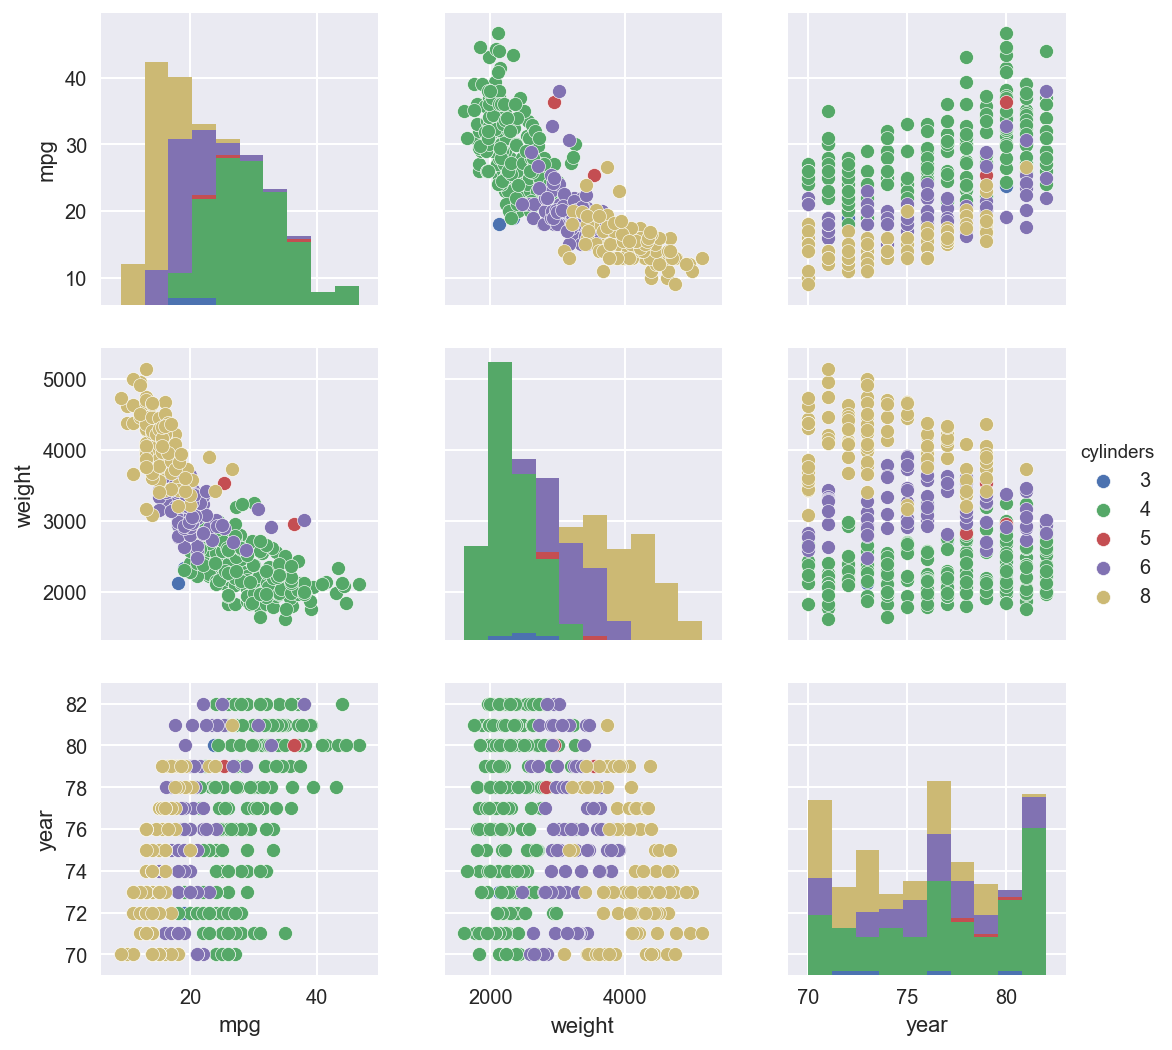

In [92]:
sns.pairplot(cars, hue='cylinders', vars=['mpg', 'weight', 'year'])

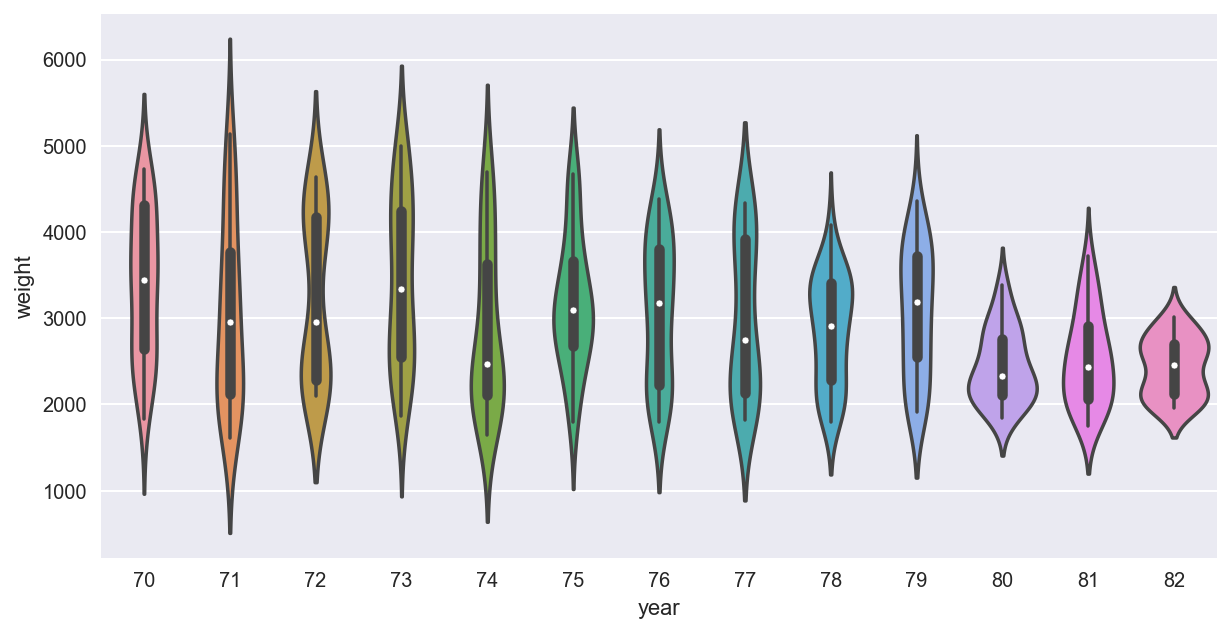

In [93]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
sns.violinplot(x='year', y='weight', data=cars)

In [155]:
avg_by_year = cars.groupby('year').mean()

In [156]:
avg_by_year

,mpg,cylinders,displacement,...,weight,acceleration,origin
year,,,,,,,
70,18,7,281,...,"3,373",13,1
71,21,6,214,...,"3,031",15,1
...,...,...,...,...,...,...,...
81,30,5,137,...,"2,530",16,2
82,32,4,128,...,"2,434",17,2


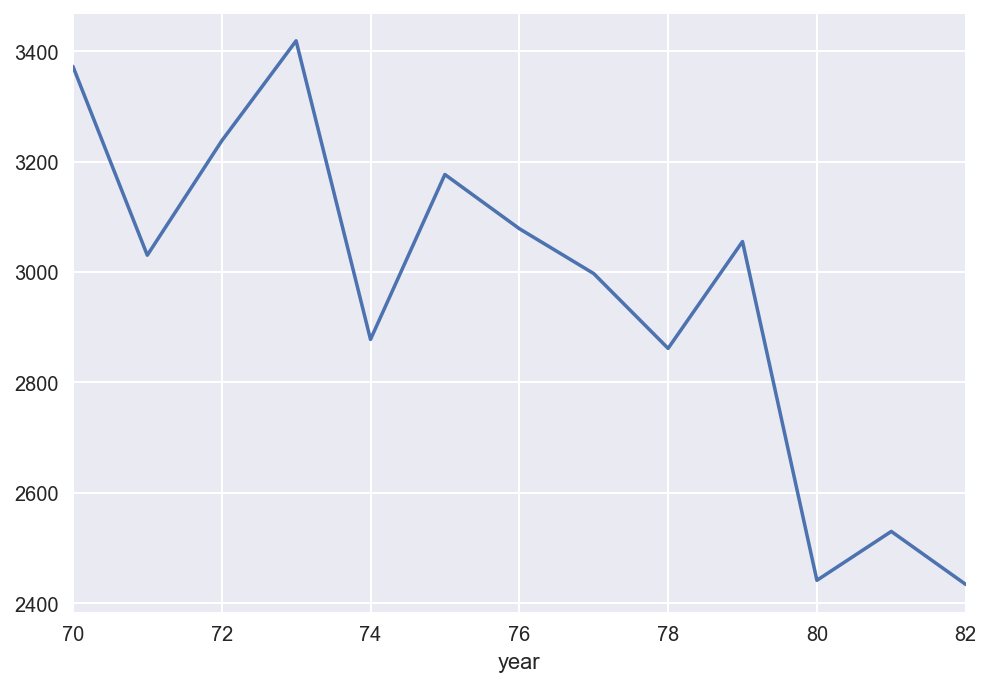

In [96]:
avg_by_year['weight'].plot()

### 1.1.1	How did the popularity of 3, 4, 5 etc. cylinder cars vary over the years?

In [97]:
n_cylinders = cars.groupby('year')['cylinders'].value_counts()
n_cylinders = pd.DataFrame({"count":n_cylinders})
n_cylinders

count
year cylinders       
70   8             18
     4              7
...               ...
82   4             27
     6              3

[43 rows x 1 columns]

In [98]:
n_cylinders.unstack(level=1)

count                     
cylinders     3     4   5    6     8
year                                
70          NaN   7.0 NaN  4.0  18.0
71          NaN  12.0 NaN  8.0   7.0
...         ...   ...  ..  ...   ...
81          NaN  20.0 NaN  7.0   1.0
82          NaN  27.0 NaN  3.0   NaN

[13 rows x 5 columns]

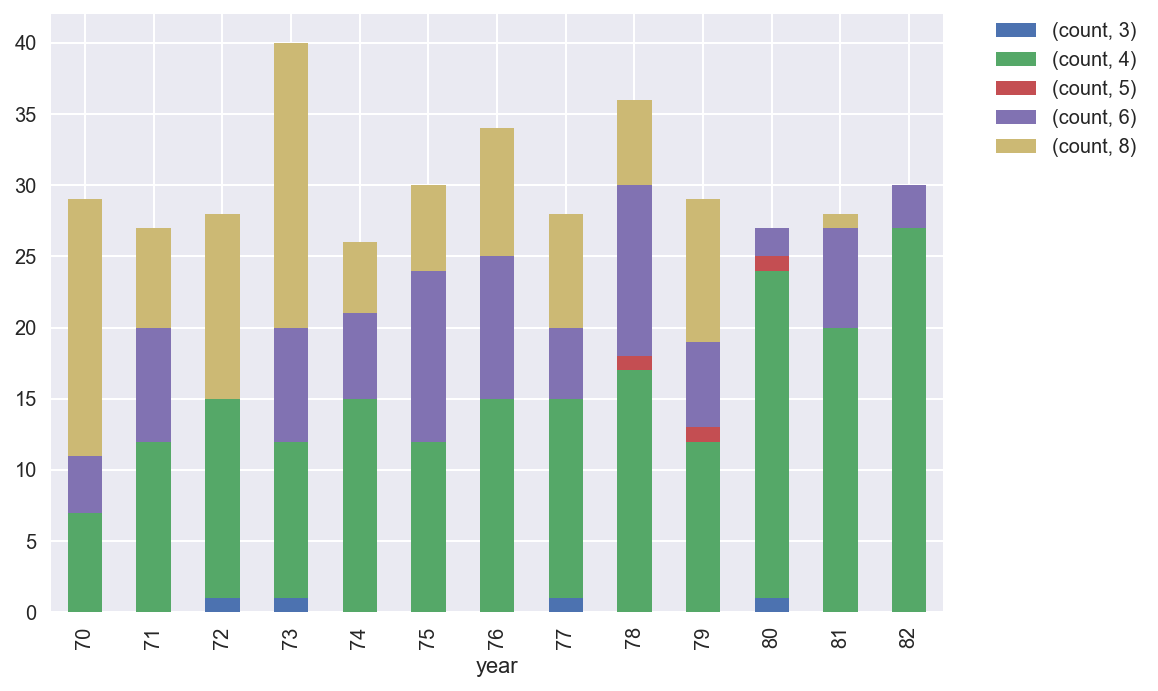

In [99]:
n_cylinders.unstack(level=1).plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Here is a normalised version of the above "stacked bar" chart:

In [100]:
unstacked = n_cylinders.unstack(level=1)

n_cylinders_norm = unstacked.div(unstacked.sum(axis=1), axis=0)

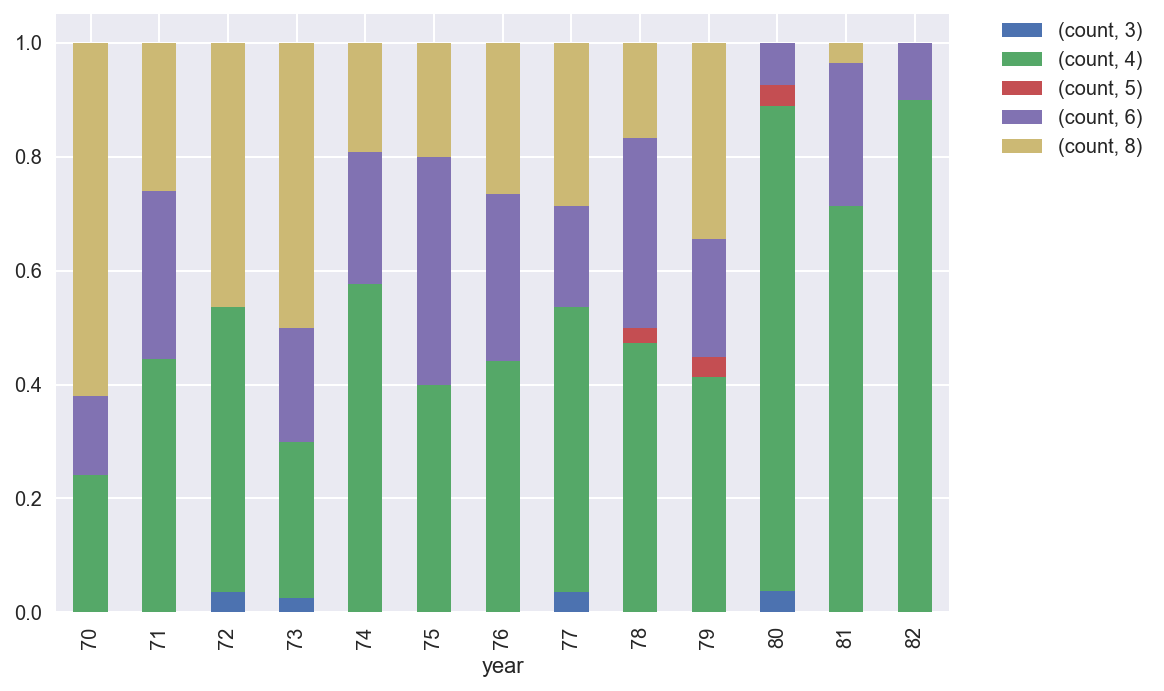

In [101]:
n_cylinders_norm.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)